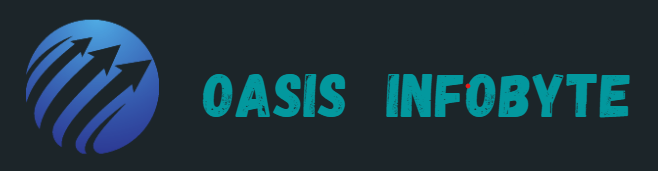

## Task @ 5 - Sales Prediction using Python
## Data Science Internship
## Mythili Subramanian

###### Importing the relevant libraries

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

###### Reading the input car dataset and loading it into a DataFrame

In [22]:
df = pd.read_csv("C:/Users/Mythili/Downloads/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


###### Dropping the irrelevant 'Unnamed' column

In [24]:
newdf = df.select_dtypes(exclude=['int64'])
newdf

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


###### Checking for null values in the DataFrame

In [26]:
newdf.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

###### Observation: There are no null values in the dataset

###### Deriving the statistical summary of the DataFrame

In [27]:
newdf.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


###### Creating Box Plots for all the attributes of the DataFrame

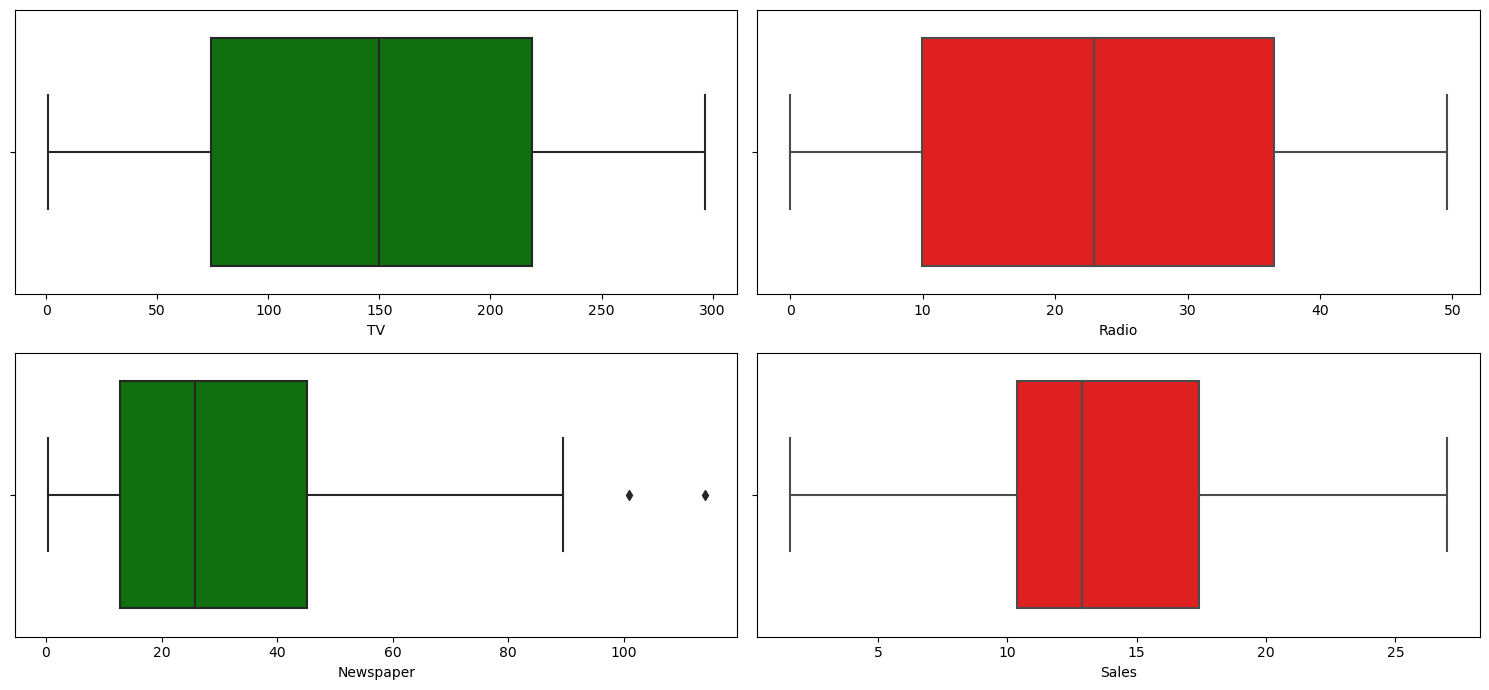

In [28]:
fig, axes = plt.subplots(nrows = 2 , ncols = 2 , figsize = (15 , 7))
sns.boxplot(data = newdf , x = newdf["TV"] , ax = axes[0,0],color = "g")  
sns.boxplot(data = newdf , x = newdf["Radio"] , ax = axes[0,1],color = "r")  
sns.boxplot(data = newdf , x = newdf["Newspaper"] , ax = axes[1,0],color = "g")  
sns.boxplot(data = newdf , x = newdf["Sales"] , ax = axes[1,1],color = "r")
plt.tight_layout()
plt.show()

###### Observations: Only Newspaper attribute has outliers

###### Creating Regression Plots

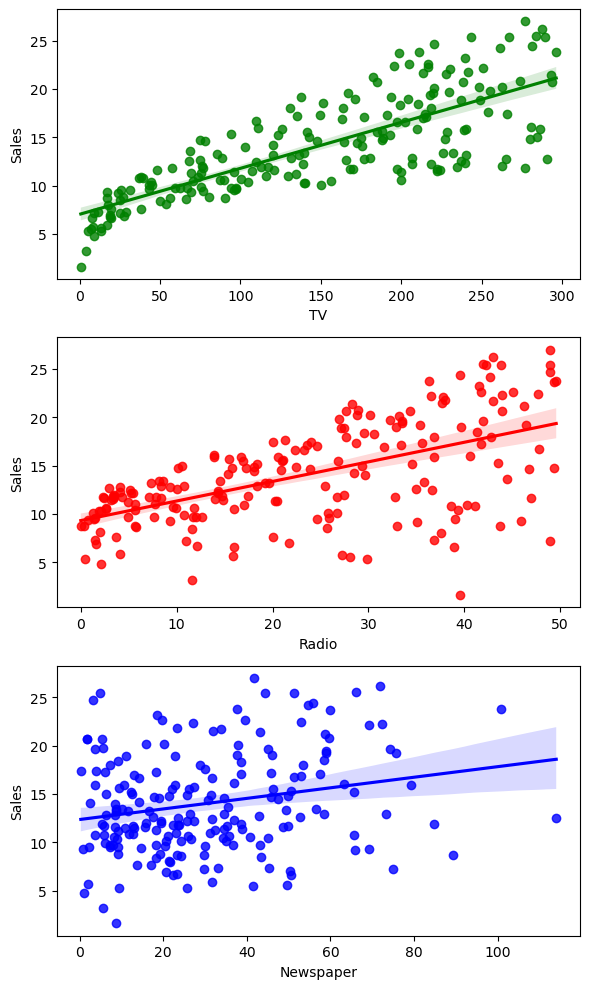

In [29]:
fig, axis = plt.subplots(nrows = 3 , ncols = 1 , figsize = (6, 10))
sns.regplot(data = newdf , x = newdf["TV"] , y = newdf["Sales"] , ax = axis[0],color = "g")  
sns.regplot(data = newdf , x = newdf["Radio"] , y = newdf["Sales"] , ax = axis[1],color = "r")  
sns.regplot(data = newdf , x = newdf["Newspaper"] , y = newdf["Sales"] , ax = axis[2],color = "b")  
plt.tight_layout()
plt.show()

###### Observation: All 3 advertising modes TV, Radio and Newspaper are positively correlated to Sales. Only Newspaper seems to have outliers.

###### Creating correlation matrix

In [30]:
cor = newdf.corr()
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


###### Plotting the correlation matrix onto a Heatmap

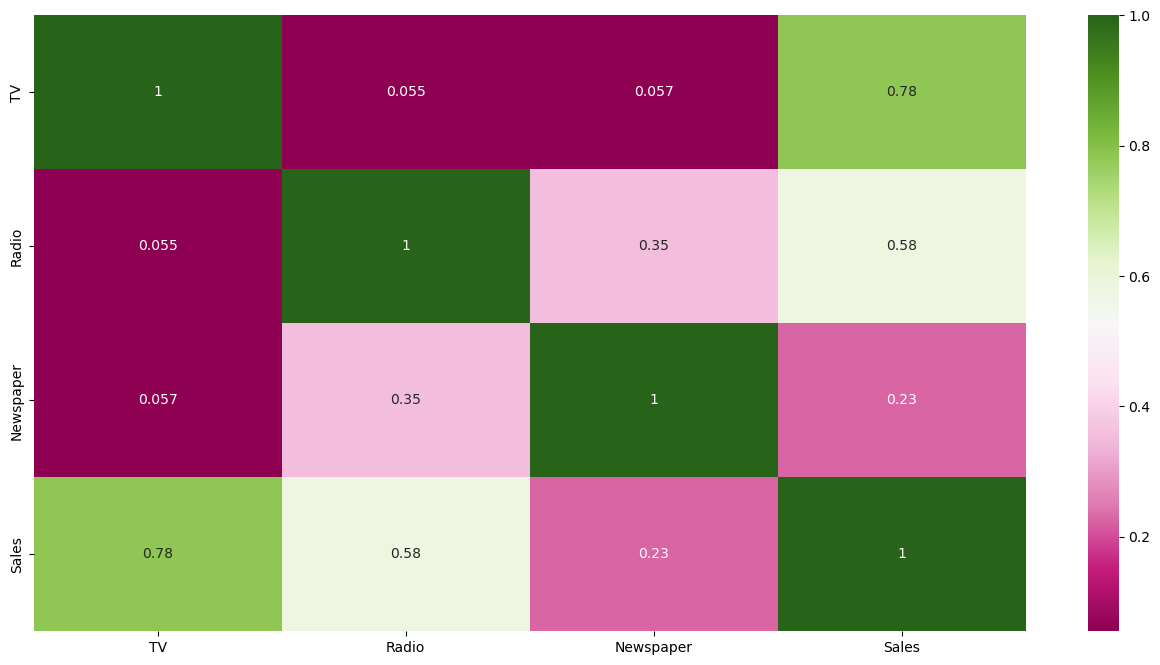

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="PiYG", annot=True)
plt.show()

###### Observations: Sales is more with TV advertising at 0.78 compared to other two modes. All 3 advertising modes are positively correlated with Sales

###### OLS (Ordinary Least Squares) Regresssion : We are using functions from Statsmodels module to perform OLS Regression using TV, Radio and Newspaper as predictor variable and Sales as response variable

In [32]:
import statsmodels.api as sm

###### Defining Predictor and Response variables

In [33]:
X = newdf[['TV', 'Radio', 'Newspaper']]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [34]:
y = newdf['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

###### Adding constant to Predictor variables

In [35]:
X = sm.add_constant(X)

###### Fit Linear Regression model

In [36]:
model = sm.OLS(y, X).fit()

###### View Model summary

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        22:49:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

###### Observation: From the coef column we can see the regression coefficients and can write the following fitted regression equation is:

Sales_TV = 2.9389 + 0.0458*(TV)

Sales_Radio = 2.9389 + 0.1885*(Radio)

Sales_Newspaper = 2.9389 - 0.0010*(Newspaper)

This means that each additional amount spent on TV is associated with an average increase in Sales of 0.0458.

The intercept value of 2.9389 tells us the average expected Sales with zero amount spent on TV.

Below is the interpretation for rest of the Model Summary:

P(>|t|): This is the p-value associated with the model coefficients. Since the p-value for hours (0.000) is less than .05, we can say that there is a statistically significant association between TV amount and Sales.

R-squared: This tells us the percentage of the variation in the Sales can be explained by the amount spent on advertising mode. In this case, 89.7% of the variation in Sales can be explained amount spent on advertising mode.

F-statistic & p-value: The F-statistic (570.3) and the corresponding p-value (1.58e-96) tell us the overall significance of the regression model, i.e. whether predictor variables in the model are useful for explaining the variation in the response variable. Since the p-value in this example is less than .05, our model is statistically significant and hours is deemed to be useful for explaining the variation in score.

###### Predicting values for Sales and Amount Spent on TV
From the results table, we note the coefficient of x and the constant term. These values are substituted in the original equation and the regression line is plotted using matplotlib.

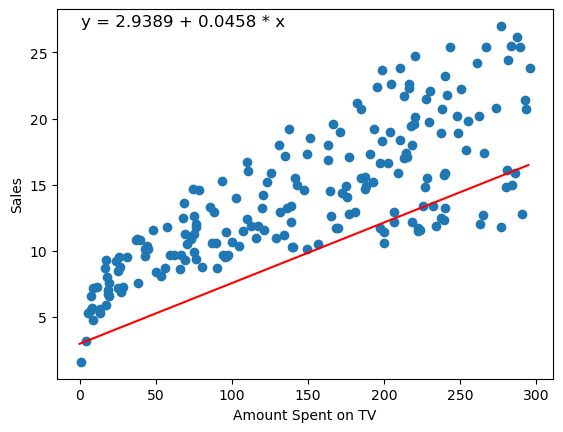

In [38]:
# plotting the original values
x = newdf['TV'].tolist()
y = newdf['Sales'].tolist()
plt.scatter(x, y)
 
# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = newdf['TV'].max()
min_x = newdf['TV'].min()
 
# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)
 
# the substituted equation
y = 2.9389 + 0.0458 * x
 
# plotting the regression line
plt.plot(y, 'r')
plt.text(1, 27, "y = 2.9389 + 0.0458 * x", size=12)

#add axis labels
plt.xlabel('Amount Spent on TV')
plt.ylabel('Sales')
plt.show()

###### Observation: From looking at the plot, it looks like the fitted regression line does a good job of capturing the relationship between the amount spent on TV variable and the sales variable.

###### Predicting values for Sales and Amount Spent on Radio

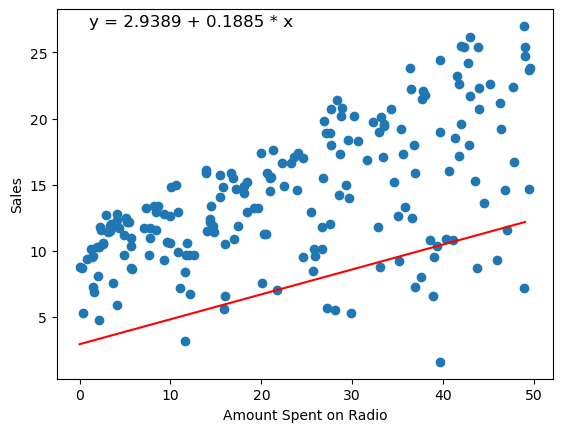

In [39]:
# plotting the original values
x = newdf['Radio'].tolist()
y = newdf['Sales'].tolist()
plt.scatter(x, y)
 
# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = newdf['Radio'].max()
min_x = newdf['Radio'].min()
 
# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)
 
# the substituted equation
y = 2.9389 + 0.1885 * x
 
# plotting the regression line
plt.plot(y, 'r')
plt.text(1, 27, "y = 2.9389 + 0.1885 * x", size=12)

#add axis labels
plt.xlabel('Amount Spent on Radio')
plt.ylabel('Sales')
plt.show()

###### Observation: From looking at the plot, it looks like the fitted regression line does a fair job of capturing the relationship between the amount spent on TV variable and the Radio variable.

###### Predicting values for Sales and Amount Spent on Newspaper

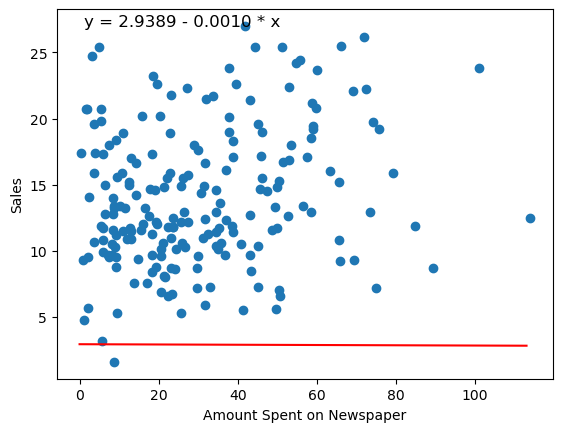

In [40]:
# plotting the original values
x = newdf['Newspaper'].tolist()
y = newdf['Sales'].tolist()
plt.scatter(x, y)
 
# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = newdf['Newspaper'].max()
min_x = newdf['Newspaper'].min()
 
# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)
 
# the substituted equation
y = 2.9389 - 0.0010 * x
 
# plotting the regression line
plt.plot(y, 'r')
plt.text(1, 27, "y = 2.9389 - 0.0010 * x", size=12)

#add axis labels
plt.xlabel('Amount Spent on Newspaper')
plt.ylabel('Sales')
plt.show()

###### Observation: From looking at the plot, it looks like the fitted regression line does not do a good job of capturing the relationship between the amount spent on Newspaper variable and the sales variable.